# Task 3.2 Construct Parametriezed Circuits

**Overview:** This notebook covers how to construct parameterized circuits.

Parameterized circuits in Qiskit are used to create flexible quantum algorithms that can adapt to different tasks by tuning their parameters. we start by Identifying:

*   **Parameter class** and its attributes and methods
*   **Quantum circuits** and how to use parameters in it.
*   **Parameter expressions** and when to use them.


In [1]:
import numpy as np
from qiskit.circuit import QuantumCircuit, Parameter

## Objective 1: Parameter

In Qiskit, the `Parameter` class allows you to create symbolic variables that can be used in quantum circuits. These parameters remain unbound until circuit execution, enabling the creation of parameterized quantum circuits.

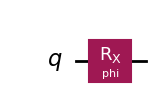

In [2]:
 # create the parameter  symbolic variable named 'phi' 
phi = Parameter('phi')
qc = QuantumCircuit(1)
 
# use parameter in place of numeric values in quantum gates
# The circuit remains unbound until parameters are assigned
qc.rx(phi, 0)
qc.draw('mpl')

The parameters are then assigned values after the circuit is created. The same ciruict can then be run multiple times with different parameter values.

Parameterized circuit:
phi = π


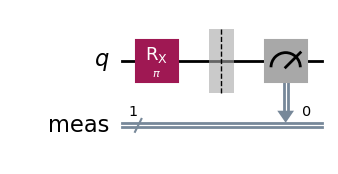

In [3]:
# bind the parameters after circuit to create a bound circuit
# it can be assigned on the same circuit or a copy of it
qc = qc.assign_parameters({phi: np.pi})
qc.measure_all()
print("Parameterized circuit:")
print("phi = π")
qc.draw('mpl')

### Attributes

| Attribute | Description | Notes |
|-----------|-------------|----------------|
| **`name`** | Parameter name |  |
| **`uuid`** | Parameter identifier |  |


In [4]:
print(f"Parameter name: {phi.name}")
print(f"Parameter UUID: {phi.uuid}")

Parameter name: phi
Parameter UUID: ba837cd0-cb32-49e4-9e28-8336fca2f100


### Methods

* **abs** : absoulte value of the parameter.
* **arccos**: Arccosine of the parameter.
* **arcsin**: Arcsine of the parameter.
* **arctan**: Arctangent of the parameter.
* **assign**: assign one paramter to a value.
* **bind**: bind parameters to their values.
* **conjugate**: complex conjugate of the parameter.
* **cos**: cosine of the parameter.
* **exp**: exponentiate of the parameter.
* **gradient**: derivative with respect to input parameter.
* **is_real**: checks if the parameter is a real number.
* **log** : natural logarithm of the parameter.
* **numeric**: cast the parameter to a numeric value.
* **sign**: return the sign of the parameter.
* **sin**: sine of the parameter.
* **subs**: returen a new expression with replacement parameters.
* **sympify**: a SymPy equivalent of the paramater.
* **tan**: tangent of the parameter.

In [5]:
print(f"Sin: {phi.sin()}")
print(f"Cos: {phi.cos()}")
print(f"tan: {phi.tan()}")

Sin: sin(phi)
Cos: cos(phi)
tan: tan(phi)


## Objective 2: Quantum Circuit

The `QuantumCircuit` class is a fundamental building block for quantum programs in Qiskit. It represents a collection of quantum gates and operations.

Parameters can be used across different qubits and gate types, additionally circuits can contain multiple parameters.

The example below shows a circuit with multiple parameters, to get all unbound parameters in a circuit, you can use `parameters` attribute.

Multi-parameter circuit:
Circuit parameters: ParameterView([Parameter(γ), Parameter(θ)])


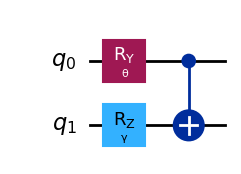

In [6]:
# Create a multi-parameter circuit
theta = Parameter('θ')
gamma = Parameter('γ')

qc2 = QuantumCircuit(2)
qc2.ry(theta, 0)
qc2.rz(gamma, 1)
qc2.cx(0, 1)

print("Multi-parameter circuit:")
print(f"Circuit parameters: {qc2.parameters}")
qc2.draw('mpl')


Use ```dict``` types to bind multiple parameters to values

Bound circuit values:
theta = π/2, gamma = π/4


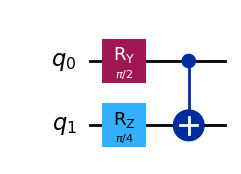

In [7]:
# Multiple ways to bind parameters
param_dict = {theta: np.pi/2, gamma: np.pi/4}

# assign_parameters (returns new circuit)
bound_circuit = qc2.assign_parameters(param_dict)


print("Bound circuit values:")
print(f"theta = π/2, gamma = π/4")
bound_circuit.draw('mpl')

## Objective 3: Parmater Expression

`ParameterExpression` enables creating mathematical expressions of Parameters, allowing complex parameter relationships and constraints. they are created using standard mathematical operations, additionally expressions can include trigonometric functions, logarithms, and other operations

In [8]:
from qiskit.circuit import Parameter

# Create base parameters
x = Parameter('x')
y = Parameter('y')

# Create mathematical expressions
expr1 = x + y
expr2 = 2 * x - y**2
expr3 = np.sin(x) + np.cos(y)

print(f"Expression 1: {expr1}")
print(f"Expression 2: {expr2}")
print(f"Expression 3: {expr3}")
print(f"Parameters in expr1: {expr1.parameters}")

Expression 1: x + y
Expression 2: 2*x - y**2
Expression 3: sin(x) + cos(y)
Parameters in expr1: {Parameter(x), Parameter(y)}


Parameter expressions can be then used directly in quantum gates, as the circuit will automatically extract all base parameters from expressions, and this enables creating the circuit with dependent parameters

Circuit with parameter expressions:
All parameters: ParameterView([Parameter(α), Parameter(β)])


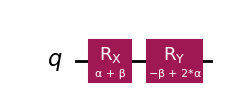

In [9]:
# Create circuit using parameter expressions
alpha = Parameter('α')
beta = Parameter('β')

expr = 2 * alpha - beta

qc3 = QuantumCircuit(1)
qc3.rx(alpha + beta, 0)  # Use parameters as an expression  as rotation angle
qc3.ry(expr, 0) # Use created expression

print("Circuit with parameter expressions:")
print(f"All parameters: {qc3.parameters}")
qc3.draw('mpl')


More Complex expressions can be created, in this case ```bind()``` method is used to assign the parameter values to the expressions

In [10]:
# Create and evaluate complex expressions
expr = (x + y) * np.cos(x) - y**2
print(f"Complex expression: {expr}")

# Bind parameters and evaluate
param_values = {x: 1.0, y: 2.0}
bound_expr = expr.bind(param_values)
numeric_value = float(bound_expr)

print(f"Bound expression: {bound_expr}")
print(f"Numeric value: {numeric_value}")

Complex expression: (x + y)*cos(x) - y**2
Bound expression: -2.3790930823955807
Numeric value: -2.3790930823955807


---
# Summary
---

In this notebook, we covered:

## Construct Parameterized Circuits:

1. **Use Parameter class** to create symbolic variables, they are assigned values after the circuit is created.
2. **Quantum Circuits** can be created with one or more parameters, and the parameters can then be assigned values.
3. **Parameter expressions** can be used to enable complex relations and constraints between parameters.



---

## Practice Questions

**1) Given the following code, what does ```qc.assign_parameters({theta: np.pi/2})``` do?**

```
theta = Parameter("θ")

qc = QuantumCircuit(1)

qc.ry(theta, 0)

qc = qc.assign_parameters({theta: np.pi/2},inplace=True)

```

A) Replaces ry with a measurement

B) Removes the parameter and sets the rotation angle to pi/2

C) Creates a new circuit that depends on theta

D) Causes a runtime error because parameters cannot be updated

E) Causes a runtime error because assign_parameters cannot be assigned on the same circuit


***Answer:***
<Details>
<br/>
B) Removes the parameter and sets the rotation angle to pi/2
assign_parameters maps the values to the parameters, and it can use the same circuit or a copy of it
</Details>

---

**2) How can you create a mathematical expression like $2x - y^2$ where x and y are Qiskit Parameter objects?**

A) ```expr = Expression(2*x - y**2)```

B) ```expr = ParameterMath(2*x - y**2)```

C) ```expr = 2*x - y**2```

D) ```expr = ParameterExpression(2*x - y**2)```

E) ```expr = CircuitExpression(x, y, lambda x,y: 2*x - y**2)```


***Answer:***
<Details>
<br/>
C) expr = 2*x - y**2

Qiskit's Parameter objects support standard Python arithmetic operations, which automatically create ParameterExpression objects. No special constructor is needed.

</Details>